In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import time
from torch.utils.tensorboard import SummaryWriter

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset_Eurosat = torchvision.datasets.EuroSAT(root='./data',
                                        download=True, transform=transform) #kein train test split
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.EuroSAT(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

In [39]:
generator = torch.Generator().manual_seed(42)
eurosat_train, eurosat_test = torch.utils.data.random_split(trainset_Eurosat, [0.7, 0.3], generator)

In [52]:
trainloader = torch.utils.data.DataLoader(eurosat_train, batch_size=4,
                                           shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(eurosat_test, batch_size=4,
                                           shuffle=False, num_workers=2)

dataiter_sat_train = iter(trainloader)
images_train = next(dataiter_sat_train)
dataiter_sat_test = iter(testloader)
images_test = next(dataiter_sat_test)

In [54]:
dataiter_sat_train = iter(trainloader)
images_train = next(dataiter_sat_train)
dataiter_sat_test = iter(testloader)
images_test = next(dataiter_sat_test)

In [48]:
images_train[0].shape

torch.Size([4, 3, 64, 64])

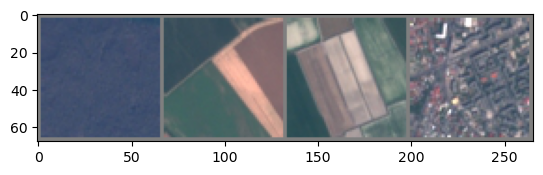

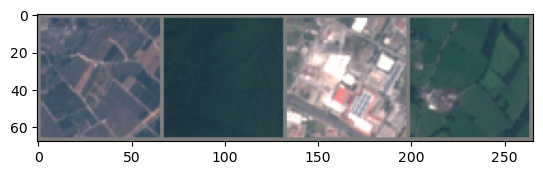

In [55]:
imshow(torchvision.utils.make_grid(images_train[0]))
imshow(torchvision.utils.make_grid(images_test[0]))

In [18]:
trainset_Aircraft = torchvision.datasets.FGVCAircraft(root='./data', split='trainval',
                                        download=True, transform=transform)

In [11]:
trainset = torchvision.datasets.GTSRB(root='./data', split='train',
                                        download=True, transform=transform)

100.0%


Extracting data\gtsrb\GTSRB-Training_fixed.zip to data\gtsrb


In [23]:
trainloader = torch.utils.data.DataLoader(trainset_Aircraft, batch_size=1,
                                           shuffle=True, num_workers=2)

In [24]:
dataiter = iter(trainloader)
images = next(dataiter)

In [25]:
images

[tensor([[[[ 0.4588,  0.4588,  0.4588,  ...,  0.3647,  0.3647,  0.3647],
           [ 0.4588,  0.4588,  0.4588,  ...,  0.3647,  0.3647,  0.3647],
           [ 0.4588,  0.4588,  0.4510,  ...,  0.3647,  0.3647,  0.3647],
           ...,
           [-1.0000, -1.0000, -0.9922,  ..., -0.6235, -1.0000, -0.9922],
           [-0.9843, -0.9843, -1.0000,  ..., -0.6235, -1.0000, -0.9608],
           [-1.0000, -1.0000, -0.9765,  ..., -1.0000, -0.9765, -0.9922]],
 
          [[ 0.4588,  0.4588,  0.4588,  ...,  0.4039,  0.4039,  0.4039],
           [ 0.4588,  0.4588,  0.4588,  ...,  0.4039,  0.4039,  0.4039],
           [ 0.4588,  0.4588,  0.4510,  ...,  0.4039,  0.4039,  0.4039],
           ...,
           [-1.0000, -1.0000, -0.9922,  ..., -0.5922, -0.9922, -1.0000],
           [-0.9843, -0.9843, -1.0000,  ..., -0.6157, -1.0000, -0.9608],
           [-1.0000, -1.0000, -0.9765,  ..., -1.0000, -0.9765, -1.0000]],
 
          [[ 0.4588,  0.4588,  0.4588,  ...,  0.4275,  0.4275,  0.4275],
           [ 

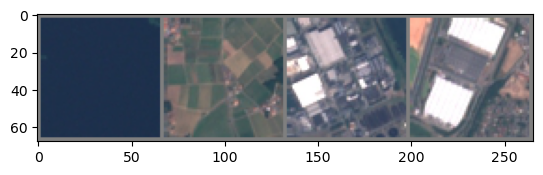

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [31]:
trainset_Flower = torchvision.datasets.Flowers102(root='./data', split='train',
                                        download=True, transform=transform) # keine Klasse
trainloader = torch.utils.data.DataLoader(trainset_Flower, batch_size=1,
                                           shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images = next(dataiter)

In [33]:
images

tensor([[[[-0.7098, -0.7098, -0.7176,  ...,  0.8431,  0.8196,  0.8275],
          [-0.7020, -0.7020, -0.7098,  ...,  0.9137,  0.8118,  0.8118],
          [-0.7020, -0.7020, -0.7098,  ...,  0.0510,  0.3804,  0.3804],
          ...,
          [-0.7490, -0.7725, -0.7725,  ..., -0.2549, -0.2549, -0.2549],
          [-0.7490, -0.7725, -0.7725,  ..., -0.2627, -0.2627, -0.2627],
          [-0.7490, -0.7725, -0.7725,  ..., -0.2627, -0.2627, -0.2627]],

         [[-0.7961, -0.7961, -0.8039,  ...,  0.3255,  0.3020,  0.2941],
          [-0.7882, -0.7882, -0.7961,  ...,  0.4431,  0.3255,  0.3255],
          [-0.7882, -0.7882, -0.7961,  ..., -0.3490, -0.0196, -0.0196],
          ...,
          [-0.8588, -0.8588, -0.8588,  ..., -0.2549, -0.2549, -0.2549],
          [-0.8588, -0.8588, -0.8588,  ..., -0.2627, -0.2627, -0.2627],
          [-0.8588, -0.8588, -0.8588,  ..., -0.2627, -0.2627, -0.2627]],

         [[-0.8431, -0.8431, -0.8510,  ...,  0.4039,  0.3961,  0.3961],
          [-0.8353, -0.8353, -

In [35]:
trainloader = torch.utils.data.DataLoader(trainset_Eurosat, batch_size=1,
                                           shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images = next(dataiter)
images

[tensor([[[[-0.5922, -0.5922, -0.5843,  ..., -0.2706, -0.2941, -0.2863],
           [-0.5922, -0.5922, -0.5922,  ..., -0.2706, -0.2941, -0.3020],
           [-0.5922, -0.5922, -0.5922,  ..., -0.2863, -0.3020, -0.3176],
           ...,
           [-0.5216, -0.5059, -0.4980,  ..., -0.5765, -0.5608, -0.5608],
           [-0.4902, -0.4824, -0.4824,  ..., -0.5765, -0.5686, -0.5608],
           [-0.4588, -0.4667, -0.4745,  ..., -0.5686, -0.5686, -0.5608]],
 
          [[-0.4353, -0.4431, -0.4275,  ..., -0.2314, -0.2549, -0.2706],
           [-0.4353, -0.4353, -0.4275,  ..., -0.2314, -0.2549, -0.2627],
           [-0.4275, -0.4275, -0.4196,  ..., -0.2471, -0.2627, -0.2627],
           ...,
           [-0.3412, -0.3412, -0.3569,  ..., -0.4039, -0.4039, -0.4039],
           [-0.3490, -0.3569, -0.3569,  ..., -0.4196, -0.4118, -0.4039],
           [-0.3412, -0.3490, -0.3647,  ..., -0.4118, -0.4039, -0.4039]],
 
          [[-0.2235, -0.2078, -0.2157,  ..., -0.0745, -0.0824, -0.0745],
           [-

In [38]:
trainset_DTD = torchvision.datasets.DTD(root='./data', split='train',
                                        download=True, transform=transform) # keine Klasse
trainloader = torch.utils.data.DataLoader(trainset_DTD, batch_size=1,
                                           shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images = next(dataiter)
images

100.0%


Extracting data\dtd\dtd-r1.0.1.tar.gz to data\dtd


[tensor([[[[ 0.0667, -0.0118, -0.1686,  ...,  0.1765,  0.0353,  0.2549],
           [ 0.2000,  0.1059, -0.1608,  ...,  0.0510,  0.0431,  0.3176],
           [ 0.2078,  0.0275, -0.1529,  ...,  0.2941, -0.0353, -0.1765],
           ...,
           [ 0.1373,  0.2078,  0.1686,  ...,  0.4510,  0.3098,  0.4745],
           [ 0.1059,  0.2235,  0.2000,  ...,  0.3412,  0.4039,  0.2627],
           [ 0.0980,  0.2157,  0.2000,  ...,  0.2706,  0.3255,  0.1686]],
 
          [[ 0.1137,  0.0275, -0.1294,  ...,  0.0745, -0.0667,  0.1529],
           [ 0.2392,  0.1451, -0.1216,  ..., -0.0510, -0.0588,  0.2157],
           [ 0.2471,  0.0667, -0.1137,  ...,  0.1843, -0.1451, -0.2863],
           ...,
           [ 0.0980,  0.1686,  0.1294,  ...,  0.3255,  0.1843,  0.3490],
           [ 0.0667,  0.1843,  0.1608,  ...,  0.2235,  0.2627,  0.1137],
           [ 0.0588,  0.1765,  0.1608,  ...,  0.1529,  0.1843,  0.0196]],
 
          [[ 0.0824, -0.0039, -0.1608,  ...,  0.0118, -0.1294,  0.0902],
           [ 